# Assignment-05
To generate from a multivariate normal distribution.

In [3]:
# importing dependencies
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# defining a uniform number generator using linear congruence generator
def uniform_generator(x_0):
    a = 1597
    b = 21544
    m = 244944
    x_0 = (a*x_0 + b)%m
    return x_0/m, x_0

In [5]:
# defining a normal generator using the Box-Muller method to sample from N(0, 1)
def normal_generator(x_1, x_2):
    u1, x_1 = uniform_generator(x_1)
    u2, x_2 = uniform_generator(x_2)
    r = math.sqrt(-2*math.log(u1))
    theta = 2*math.pi*u2
    return r*math.cos(theta), r*math.sin(theta), x_1, x_2

## Problem - 01:
We need to generate a sample from multivariate normal distribution X ~ N2( mu, sigma )

Solution is based on using the Cholesky factorisation to find a lower triangular matrix A such that AA' = sigma.


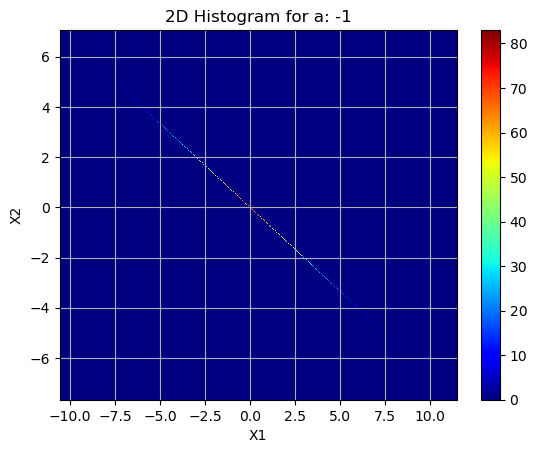

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


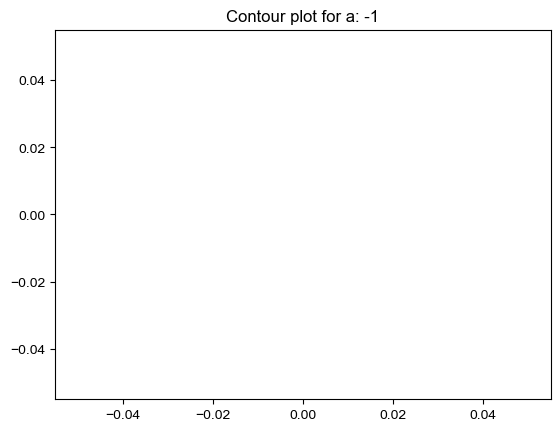

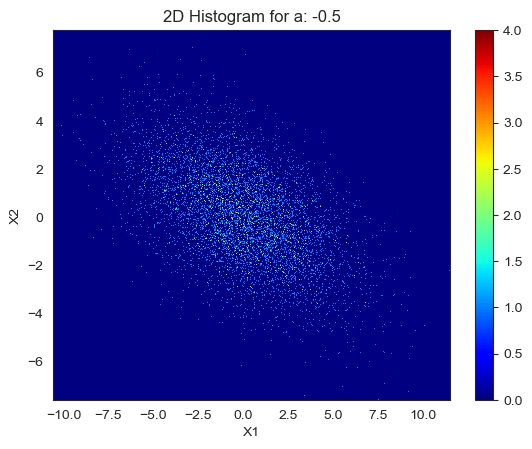

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


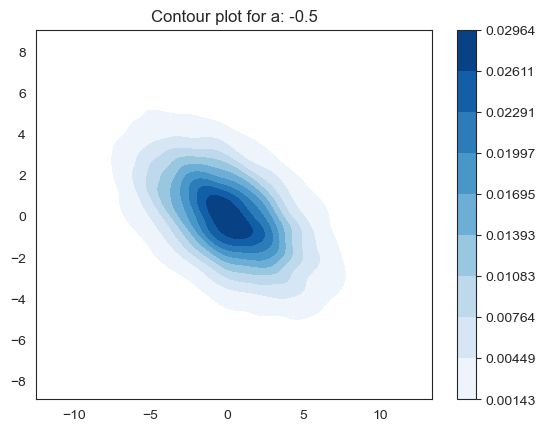

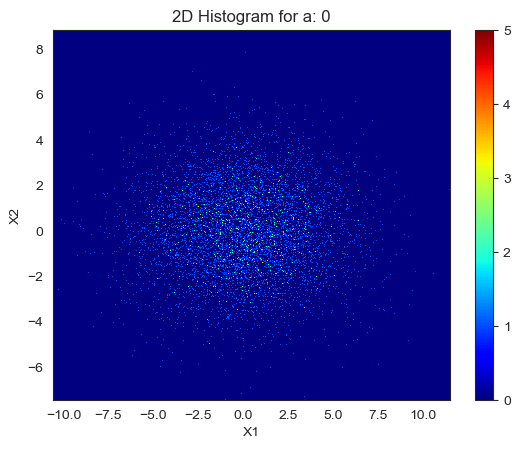

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


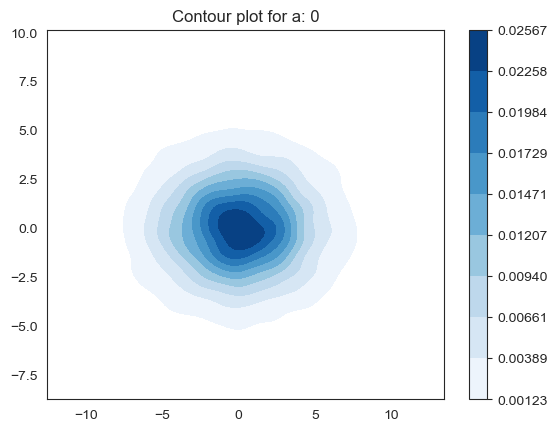

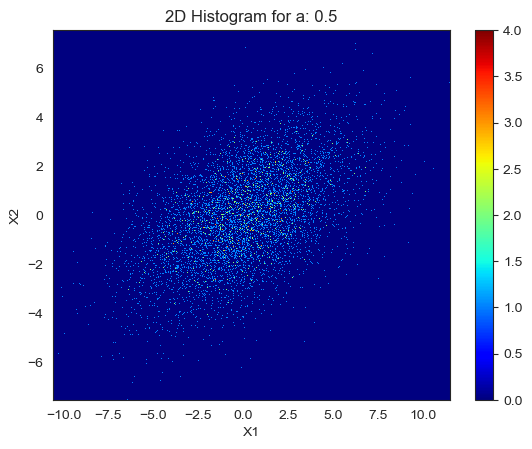

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


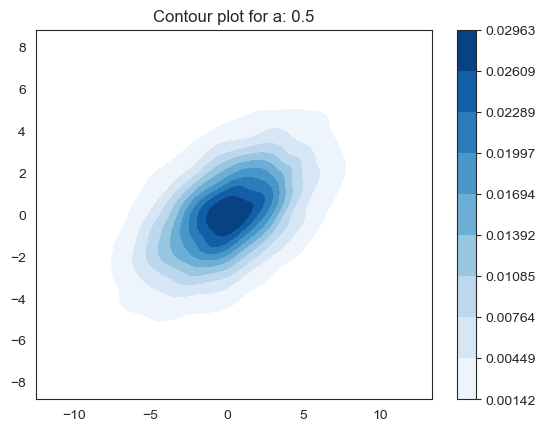

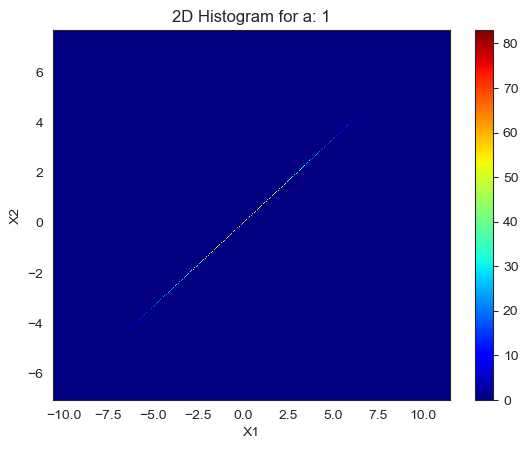

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


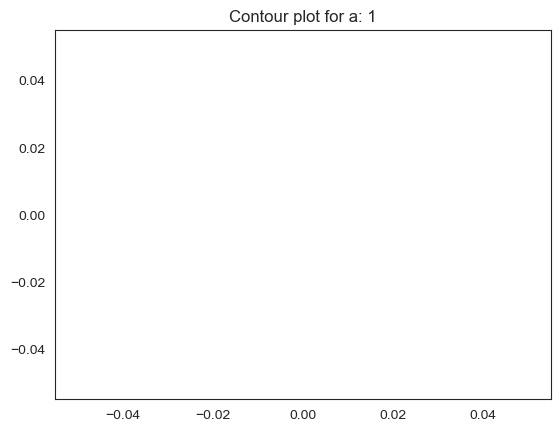

In [7]:
val = [-1, -0.5, 0, 0.5, 1]  # The different values of 'a' to calculate multivariate distribution.
mu = [[0], [0]] # Given values of mu matrix.
N = 10000
for a in val:  # Iterating over all possible given values of a.
    sigma = [[9, 6*a], [6*a, 4]]
    s1 = math.sqrt(sigma[0][0])
    s2 = math.sqrt(sigma[1][1])
    rho = sigma[0][1]/(s1*s2)
    A = [[s1, 0], [(rho*s2), (math.sqrt(1 - rho**2)*s2)]]
    X = []
    x_1 = 42
    x_2 = 529
    x_3 = 95
    x_4 = 123
    X1 = []
    X2 = []
    for _ in range (N):
        z1, r, x_1, x_2 = normal_generator(x_1, x_2)
        r, z2, x_3, x_4 = normal_generator(x_3, x_4)
        x = np.zeros((2, 1))
        x[0][0] = mu[0][0] + A[0][0]*z1
        x[1][0] = mu[1][0] + A[1][0]*z1 + A[1][1]*z2
        X.append(x)
        X1.append(x[0][0])       #Easier t
        X2.append(x[1][0])
    X = np.array(X)
    
    # Now moving on to plot the values
    # Plotting a 2d histogram
    plt.title(f"2D Histogram for a: {a}")
    plt.hist2d(X1, X2, bins = (500, 500), cmap=plt.cm.jet)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid(True)
    plt.colorbar()
    plt.show()
    # Now moving on to plot a contour plot
    plt.title(f"Contour plot for a: {a}")
    sns.set_style("white")
    sns.kdeplot(x=X1, y=X2, cmap="Blues", fill=True, cbar=True, warn_singular=False)
    plt.show()